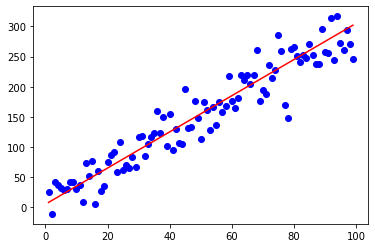

In [11]:
# Home assignment 2: Generate a noisy line dataset (using e.g. Gauss noise or a noise of other distribution)
# - Generate a 2D dataset with a noisy line (using e.g. Gauss noise or a noise of another distribution)
# - Create a code in Python (or use an existing library) that detects the line parameters (e.g., a and b coefficients of
# y = ax + b line model)
# - Visualize the RANSAC-based results


import numpy as np
from skimage.measure import LineModelND
from skimage.measure import ransac
import matplotlib.pyplot as plt
N = 100
a = 3
b = 5
x = np.arange(1, N, 1)
y = a * x + b
noise = 30*np.random.normal(size= x.size) 
y_noise = noise + y

plt.plot(x, y_noise, "bo")
plt.plot(x,y, "r")
plt.show()

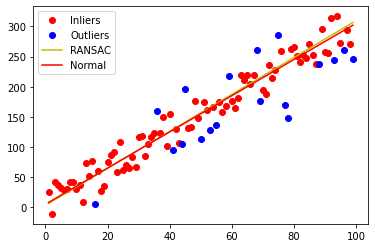

In [43]:
dim_data = np.column_stack((x,y_noise))
ransac_model, inliers = ransac(dim_data, LineModelND, min_samples=2, residual_threshold=10, max_trials=1000)
outliers = (inliers == False)
predict = ransac_model.predict_y(x)
fig, ax = plt.subplots()
ax.plot(dim_data[inliers, 0], dim_data[inliers, 1], 'ro', label='Inliers')
ax.plot(dim_data[outliers, 0], dim_data[outliers, 1], 'bo', label='Outliers')
ax.plot(x, predict, 'y', label='RANSAC')
ax.plot(x, y, 'r', label="Normal")
plt.legend()
plt.show()